In [13]:
import pandas as pd
from bs4 import BeautifulSoup

In [17]:
#This code snippet is parsing a baby table
#To understand the structure of parsing these tables
html_string = '''
      <table>
            <tr>
                <td> This </td>
                <td> is  </td>
                <td> a  </td>
                <td> row  </td>
            </tr>
        </table>
    '''
    
soup = BeautifulSoup(html_string, 'lxml') # Parse the HTML as a string
    
table = soup.find_all('table')[0] # Grab the first table
    
new_table = pd.DataFrame(columns=range(0,4), index = [0]) # I know the size 
    
row_marker = 0
for row in table.find_all('tr'): #finding all the table rows
    column_marker = 0 # a simple marker
    columns = row.find_all('td') #grabbing table data for each table row
    for column in columns:
        new_table.iat[row_marker,column_marker] = column.get_text()
        #pd.dataframe.iat = Access a single value for a row/column pair by integer position.
        #column.get_text() grabbing text of the table data
        column_marker += 1 #
    
new_table


,0,1,2,3
0,This,is,a,row


In [78]:
import requests
url = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015"
response = requests.get(url)
#response.text[:100] # Access the HTML with the text property

In [132]:
url

'https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015'

In [131]:
table = url
for url in soup.find_all('id'):
    print(url)

In [137]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
    
class HTMLTableParser:
       
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [(table.get('id'),self.parse_html_table(table))\
                for table in soup.find_all('table')]  
    
    def parse_html_table(self, table):
        n_columns = 0
        n_rows=0
        column_names = []
    
            # Find number of rows and columns
            # we also find the column titles if we can
        for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
            td_tags = row.find_all('td')
            if len(td_tags) > 0:
                n_rows+=1
                if n_columns == 0:
                    # Set the number of columns for our table
                    n_columns = len(td_tags)
                        
                # Handle column names if we find them
            th_tags = row.find_all('th') 
            if len(th_tags) > 0 and len(column_names) == 0:
                for th in th_tags:
                    column_names.append(th.get_text())
    
            # Safeguard on Column Titles
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception("Column titles do not match the number of columns")
    
        columns = column_names if len(column_names) > 0 else range(0,n_columns)
        df = pd.DataFrame(columns = columns,
                            index= range(0,n_rows))
        row_marker = 0
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                df.iat[row_marker,column_marker] = column.get_text()
                column_marker += 1
            if len(columns) > 0:
                row_marker += 1
                    
            # Convert to float if possible
        for col in df:
            try:
                df[col] = df[col].astype(float)
            except ValueError:
                pass
            
        return df


In [138]:
hp = HTMLTableParser()
url_learning = "https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015"
table = hp.parse_url(url_learning)[0][1] # Grabbing the table from the tuple
table.head()

,Rank,Player,Team,Points,Games,Avg
0,1.0,Cam Newton,CAR,389.1,16.0,24.3
1,2.0,Tom Brady,NE,343.7,16.0,21.5
2,3.0,Russell Wilson,SEA,336.4,16.0,21.0
3,4.0,Blake Bortles,LAR,316.1,16.0,19.8
4,5.0,Carson Palmer,FA,309.2,16.0,19.3


In [139]:
table.sort_values(by=['Avg'], ascending = False).head()

,Rank,Player,Team,Points,Games,Avg
0,1.0,Cam Newton,CAR,389.1,16.0,24.3
1,2.0,Tom Brady,NE,343.7,16.0,21.5
2,3.0,Russell Wilson,SEA,336.4,16.0,21.0
5,6.0,Drew Brees,NO,306.5,15.0,20.4
50,51.0,Geno Smith,SEA,20.0,1.0,20.0


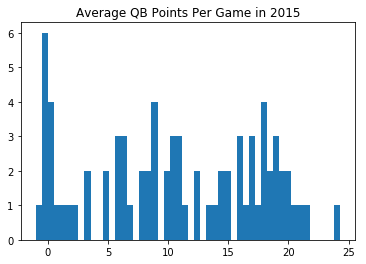

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
    
plt.figure()
avg=table['Avg'].values
plt.hist(avg, bins = 50)
plt.title('Average QB Points Per Game in 2015')


In [141]:
response = requests.get('https://www.fantasypros.com/nfl/reports/leaders/qb.php?year=2015')
soup = BeautifulSoup(response.text, 'lxml')
        
 

In [146]:
url = "https://www.fantasypros.com/nfl/rankings/rb.php"

In [147]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')


In [152]:
#[(table.get('id'),table.parse_html_table(table))\
for table in soup.find_all('table'): #]  
    for row in table.find_all('tr'):
        #print(row)
        td_tags = row.find_all('td')
        if len(td_tags) > 0:
            print(td_tags)

[<td class="sticky-cell sticky-cell-one">1</td>, <td class="hide-print wsis-cell"><input class="wsis" data-file="christian-mccaffrey.php" data-id="16393" data-kickoff="09/12 8:20pm" data-name="Christian McCaffrey" data-opp=" vs.  TB" data-position="RB" data-shortname="C. McCaffrey" data-team="CAR" type="checkbox"/></td>, <td class="player-label sticky-cell sticky-cell-two"><a href="/nfl/rankings/christian-mccaffrey.php?type=weekly&amp;position=RB&amp;scoring=STD"><span class="full-name">Christian McCaffrey</span><span class="short-name">C. McCaffrey</span></a> <small class="grey">CAR</small> <small class="fp-status-16393" style="vertical-align:0px;"><a href="javascript:void(0)"><span class="hard" style="font-weight:bold;"></span></a></small>
<a class="fp-player-link fp-id-16393" fp-player-name="Christian McCaffrey" href="#"></a></td>, <td class="opp-cell">  vs.  TB</td>, <td class="view-options ranks">1</td>, <td class="view-options ranks">3</td>, <td class="view-options ranks">1.5</td

In [145]:
table = hp.parse_url(url) # Grabbing the table from the tuple



Exception: Column titles do not match the number of columns

In [3]:
import pandas as pd
RB_rankings = pd.read_html("https://www.fantasypros.com/nfl/rankings/rb.php")

In [4]:
RB_rankings_df = pd.DataFrame(RB_rankings[0])

In [57]:
RB_rankings_df['Best']

0        1.0
1        1.0
2        1.0
3        1.0
4        3.0
5        5.0
6        5.0
7        2.0
8        6.0
9        4.0
10       4.0
11       5.0
12       3.0
13       5.0
14       6.0
15       6.0
16       5.0
17       7.0
18       9.0
19      11.0
20      15.0
21      12.0
22      13.0
23      13.0
24      18.0
25      19.0
26      21.0
27      17.0
28      21.0
29      22.0
       ...  
103     22.0
104     71.0
105     78.0
106     84.0
107     77.0
108     67.0
109     84.0
110     81.0
111     62.0
112     93.0
113     67.0
114     80.0
115     84.0
116     86.0
117     91.0
118     76.0
119     78.0
120     84.0
121     86.0
122     82.0
123    101.0
124     83.0
125     97.0
126     92.0
127    109.0
128    106.0
129     98.0
130    113.0
131    109.0
132    111.0
Name: Best, Length: 133, dtype: float64

In [40]:
RB_rankings_df.columns

Index(['Rank', 'WSIS', 'Running Backs (Team)', 'Opp', 'Best', 'Worst', 'Avg',
       'Std Dev', 'Notes\n                            '],
      dtype='object')

In [65]:

    
data = { 'Player': [RB_rankings_df['Running Backs (Team)'].
             str.split('[A-Z]+[.]', expand=True)[0]], 
             'Best Rating': [RB_rankings_df['Best']],
            'Worst Rating': [RB_rankings_df['Worst']]}

In [69]:
df = pd.DataFrame(data)

In [75]:
df[]
df['column_new_1'], df['column_new_2'], df['column_new_3'] = [np.nan, 'dogs', 3]


0    0      Christian McCaffrey
1          Ezekiel ...
Name: Player, dtype: object

In [85]:
RB_rankings_df['Opp']

0       vs. TB
1       at WAS
2      vs. BUF
3       at LAR
4      vs. CLE
5       at NYJ
6      vs. SEA
7        at GB
8       at PIT
9      vs. IND
10      at BAL
11      vs. NO
12     vs. ARI
13      at MIA
14      at DET
15      vs. KC
16      at TEN
17      at HOU
18     vs. LAC
19      at OAK
20      at CIN
21     vs. MIN
22     vs. PHI
23      at OAK
24      at NYG
25     vs. JAC
26      at MIA
27     vs. CHI
28      at ATL
29     vs. DAL
        ...   
103     at CIN
104     at NYG
105     vs. TB
106     at WAS
107    vs. CLE
108     at WAS
109     at DET
110      at GB
111     at WAS
112     at LAR
113     vs. SF
114     at OAK
115     at DET
116    vs. PHI
117     at CAR
118    vs. IND
119    vs. BUF
120    vs. LAC
121     at PIT
122    vs. BUF
123    vs. PHI
124    vs. JAC
125     at BAL
126     at HOU
127     at MIA
128    vs. MIN
129    vs. CHI
130     at LAR
131     at HOU
132    vs. JAC
Name: Opp, Length: 133, dtype: object

In [87]:
s1= RB_rankings_df['Running Backs (Team)'].str.split(
    '[A-Z]+[.]', expand=True)[0]
s2 = RB_rankings_df['Opp']
s3 = RB_rankings_df['Best']
s4 = RB_rankings_df['Worst']
s5 = RB_rankings_df['Std Dev']


In [95]:
RBRankings = pd.DataFrame(dict(s1 = s1,
                  s2 = s2,
                  s3 = s3, 
                  s4 = s4,
                  s5 = s5)).reset_index()

In [100]:
RBRankings.rename(columns={"s1":"Players",
                          "s2":"Opp",
                          "s3":"Best",
                          "s4":"Worst",
                          "s5":"Std Dev"}) # A table!!

,index,Players,Opp,Best,Worst,Std Dev
0,0,Christian McCaffrey,vs. TB,1.0,3.0,0.7
1,1,Ezekiel Elliott,at WAS,1.0,11.0,2.0
2,2,Saquon Barkley,vs. BUF,1.0,11.0,1.0
3,3,Alvin Kamara,at LAR,1.0,7.0,0.8
4,4,Le'Veon Bell,vs. CLE,3.0,9.0,1.2
5,5,Nick Chubb,at NYJ,5.0,17.0,1.6
6,6,James Conner,vs. SEA,5.0,29.0,2.6
7,7,Dalvin Cook,at GB,2.0,16.0,2.1
8,8,Chris Carson,at PIT,6.0,17.0,2.5
9,9,Derrick Henry,vs. IND,4.0,22.0,3.9


In [44]:
RB_rankings_df[[RB_rankings_df['Running Backs (Team)'].str.split(
    '[A-Z]+[.]', expand=True)[0],
    'Opp', 'Best', 'Worst','Avg','Std Dev']]

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [5]:
type(RB_rankings)

list

In [6]:
RB_rankings_df.columns

Index(['Rank', 'WSIS', 'Running Backs (Team)', 'Opp', 'Best', 'Worst', 'Avg',
       'Std Dev', 'Notes\n                            '],
      dtype='object')

In [7]:
RB_rankings_df['Running Backs (Team)']

0      Christian McCaffreyC. McCaffrey CAR
1            Ezekiel ElliottE. Elliott DAL
2             Saquon BarkleyS. Barkley NYG
3                 Alvin KamaraA. Kamara NO
4                  Le'Veon BellL. Bell NYJ
5                   Nick ChubbN. Chubb CLE
6                James ConnerJ. Conner PIT
7                   Dalvin CookD. Cook MIN
8                Chris CarsonC. Carson SEA
9                Derrick HenryD. Henry TEN
10             David JohnsonD. Johnson ARI
11                Todd GurleyT. Gurley LAR
12                Mark IngramM. Ingram BAL
13                 Sony MichelS. Michel NE
14              Austin EkelerA. Ekeler LAC
15                Josh JacobsJ. Jacobs OAK
16                  Marlon MackM. Mack IND
17       Leonard FournetteL. Fournette JAC
18           Kerryon JohnsonK. Johnson DET
19           Damien WilliamsD. Williams KC
20                 Matt BreidaM. Breida SF
21                  Aaron JonesA. Jones GB
22           Devonta FreemanD. Freeman ATL
23         

In [12]:
rb_rankings = pd.DataFrame(RB_rankings_df['Running Backs (Team)'].str.split('[A-Z]+[.]', expand=True)[0])

In [13]:
rb_rankings

,0
0,Christian McCaffrey
1,Ezekiel Elliott
2,Saquon Barkley
3,Alvin Kamara
4,Le'Veon Bell
5,Nick Chubb
6,James Conner
7,Dalvin Cook
8,Chris Carson
9,Derrick Henry


In [33]:
for index, row in rb_rankings.iterrows():
    print(row.str.len)

<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f14d68>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f147f0>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f14d68>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f147f0>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f14d68>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f147f0>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f14d68>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f147f0>>
<bound method _noarg_wrapper.<locals>.wrapper of <pandas.core.strings.StringMethods object at 0x106f14d68>>
<bound method _noarg_wrapper